## First half

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def fn(x):
    return 3*x**2 - 4*x + 5

In [ ]:
fn(2)

9

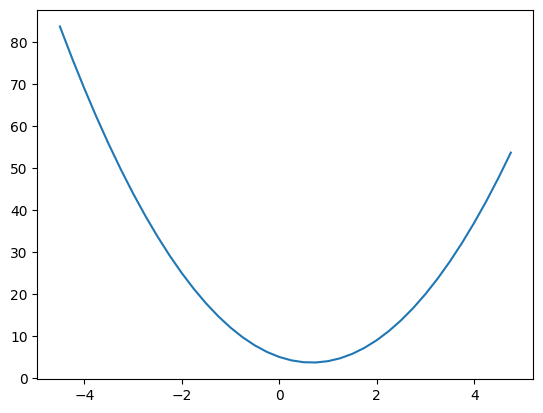

In [ ]:
xs = np.arange(-4.5,5.0,0.25)
ys = fn(xs)

plt.plot(xs,ys)

In [ ]:
#there are mostly two-three scenarios either the derivate/slope would go high or low or not move with any change in the input

# A derivative tells us how much a function's output changes
# in response to a very small change in its input (slope of the function)
h = 0.0001 #very small value
x = 3.0
(fn(x+h) - fn(x))/h  #This tell dg/dx like how much g got changed after a small change in h
#so its contributing 14 slope
# It tells us how much fn(x) changes per unit change in x near x = 3.0
# In other words, it gives the slope of the function at that point (df/dx or f'(x))

14.000300000063248

In [ ]:
#Now at few scenario where the input is not affecting the function then the derivative (slope) of that function becomes zero
h = 0.000001
x = 2/3
(fn(x+h)-fn(x))/h

#

2.999378523327323e-06

In [ ]:
#Lets get more complex

a = 2.0
b = -3.0
c = 10.0

d = a*b+c
print(d)

4.0


In [ ]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+ c
a += h
d2 = a*b+c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)
# Explanation:
# We are approximating the derivative of the expression d = a * b + c with respect to 'a'.
# This tells us how much the output 'd' changes when 'a' is increased by a small amount.
# The expected slope is 'b', since d = a*b + c and ∂d/∂a = b.
# So the derivative should be -3, which matches what we get from the slope.

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [ ]:
import math

class Value:
    def __init__(self,data, _children = (),_op = '',label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op #through this we would know from which equation it was derived
        self.label = label
        self.grad = 0.0 #if grad is 0 so this is not affecting the output
        self._backward = lambda : None

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self,other):
        out = Value((self.data + other.data),(self,other), '+')

        def _backward():
          self.grad += 1.0 * out.grad #we are accumulating the grad if we need to save the value
          other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self,other):
        out = Value((self.data * other.data),(self,other),'*')

        def _backward():
          self.grad += out.grad * other.data
          other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def tanh(self):
      x = self.data
      t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
      out = Value(t, (self, ), 'tanh')

      def _backward():
        self.grad += (1-t**2) * out.grad

      out._backward = _backward

      return out

    def backward(self):

      topo = []
      visited = set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      self.grad = 1.0
      for node in reversed(topo):
        node._backward()

a = Value(3.0,label = 'a')
b = Value(-1.0,label = 'b')

# a + b #a.__add__(b)

c = Value(-5.0,label = 'c')
d = a*b ; d.label = 'd'
e = d + c #(a.__mul__(b)).__add__(c)
e.label = 'e'
e

Value(data = -8.0)

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.2f}" % (n.label, n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

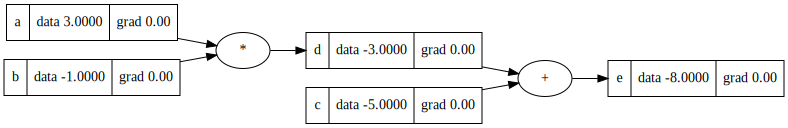

In [ ]:
#Here we get the complete flow how d was derived
#now we will do the backpropagation and calculate the gradients of the output w.r.t to each node
#so we will see how output is changing w.r.t to change in the node value -> it will give us the slope/derivative
#which represents the change in the value of a node which is affecting the output
draw_dot(e)

In [ ]:
# e = c + d

# de/dc = ? #if there's a change in c of h amount what would be change or the slope/derivative would be

# #if we take a derivative normally
# de/dc = d


# #if we consider it through the formula

# f(x+h) - f(x)/h

# ((c+h) + d) - (c+d)/h
# h /h



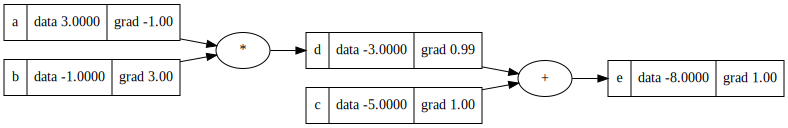

In [ ]:
draw_dot(e)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
d.data += 0.01 * d.grad

e = d + c
print(e.data)

-7.9801


### Chain rule ⭐


1. if i wanna know how my output e is chainging w.r.t to a we will need to apply chain rule
2. we can easily know how d is contributing to the output similarly if i wanna know how a is contributing to the output we will need to do the chain rule

we wanna know how my output e is changing if there's change in a de/da


```
d = a * b

dd/db = a
dd/da = b
```



WANT :

`de / da = (de / dd) * (dd / da)`

so you can see how we backward and calculate it
so we already knew de/dd and dd/da was a local thing which we knew we used and multiplied and we got to know how a is affecting the output e




**IMP**

1. So when do the + operation the gradients flowing backward is always the same so n = z + b so the gradient of z and b would be always equals to the n .... if we take the derivative of the dn/dz = 1, dn/db = 1

if we apply the chain rule



```
dL/dz = dL/dn * dn/dz = dL/dn * 1 = dL/dn = grad(n)
dL/db = dL/dn * dn/db = dL/dn * 1 = dL/dn = grad(n)
```




In [ ]:
0.99 * -1 #de/dd * dd/da = 0.99 * -1 = -0.99 Through the chain rule we got to know how a was affecting the output

-0.99

In [ ]:
def lol():
  h = 0.001

  a = Value(3.0,label = 'a')
  b = Value(-1.0,label = 'b')

  # a + b #a.__add__(b)

  c = Value(-5.0,label = 'c')
  d = a*b ; d._label = 'd'
  e = d + c #(a.__mul__(b)).__add__(c)
  e._label = 'e'
  L1 = e.data

  a = Value(3.0+h,label = 'a')
  b = Value(-1.0,label = 'b')

  # a + b #a.__add__(b)

  c = Value(-5.0,label = 'c')
  d = a*b ; d._label = 'd'
  e = d + c #(a.__mul__(b)).__add__(c)
  e._label = 'e'
  L2 = e.data
  # L2 += h #we added to the output what would be the slope of output w.r.t output -> its always 1

  print(f'{(L2-L1)/h}')

lol()


-0.9999999999994458


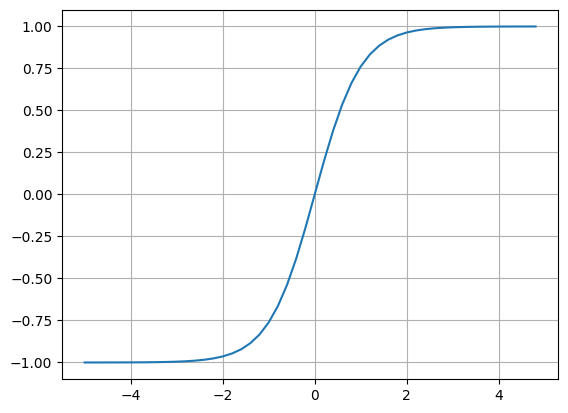

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

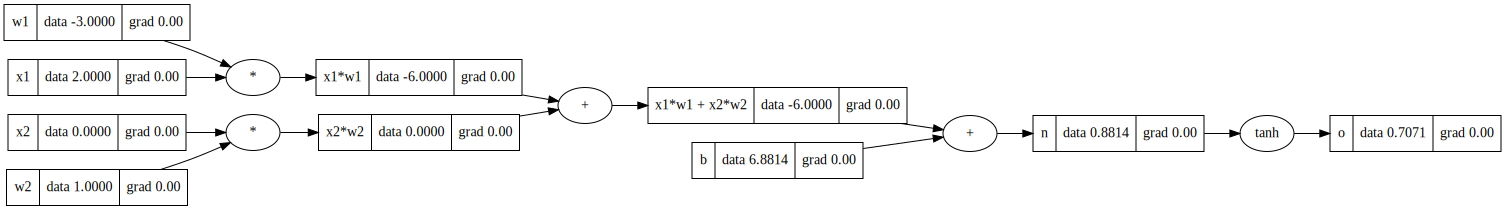

In [ ]:
draw_dot(o)

In [ ]:
o.backward()

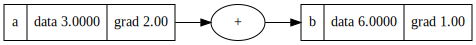

In [ ]:
a = Value(3.0, label = 'a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

## Second half

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

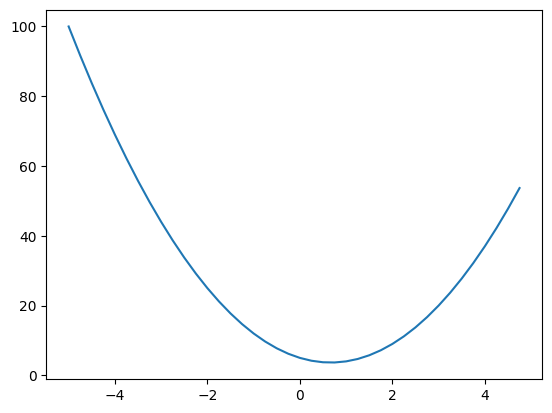

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

In [ ]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()



In [ ]:
a = Value(3.0, label = 'a')

a+1

Value(data=4.0)

In [ ]:

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot



In [ ]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


In [ ]:
o.backward()

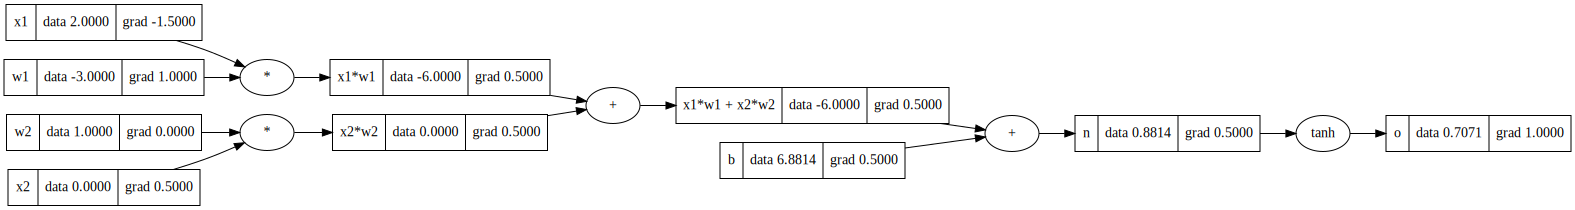

In [ ]:
draw_dot(o)

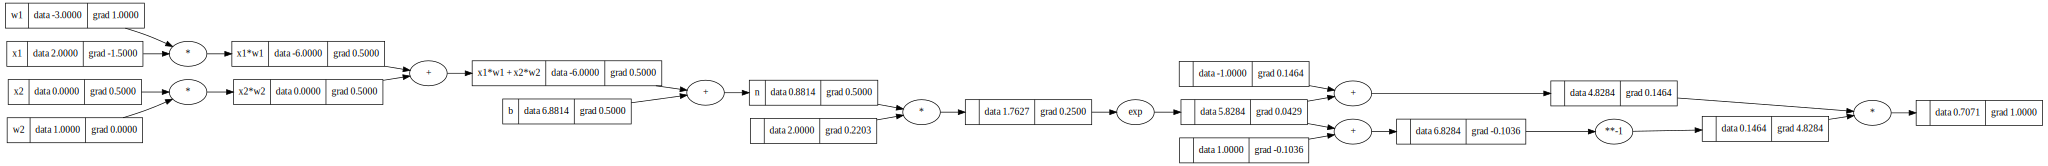

In [ ]:
#applying the formula for tanh

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

#------
e = (2*n).exp()
o = (e-1) / (e+1)
#-------
o.backward()
draw_dot(o)



In [ ]:
#Lets do it through pytorch

import torch

In [ ]:
x1 = torch.Tensor([2.0]).double()               ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:
class Neuron: #single linear layer

  def __init__(self,nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))


  def __call__(self,x):
    act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer: #nn.Linear layer torch.tanh(nn.Linear(nin,nout))
  def __init__(self,nin,nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self,x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

x = [2.0,3.0]
n = Neuron(2)
# n(x)
# l = Layer(2,3)
m = MLP(3,[4,4,1])
m(x)

Value(data=0.18340736161989973)

In [ ]:
# draw_dot(m(x))
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.8030928021400533)

In [ ]:
n.parameters(),len(n.parameters())

([Value(data=1.0612787974829532),
  Value(data=0.25368212872424717),
  Value(data=-0.0821977145297081),
  Value(data=0.05062886782138581),
  Value(data=-0.1940364302471771),
  Value(data=0.7227516810445789),
  Value(data=-1.0537208292447646),
  Value(data=-0.16495128107173646),
  Value(data=1.2053376410552006),
  Value(data=0.9516500739404518),
  Value(data=-0.21542670074836856),
  Value(data=-0.1887336160638539),
  Value(data=-0.3365777544425374),
  Value(data=-0.852600867341647),
  Value(data=0.9672140342278819),
  Value(data=0.8285010496865871),
  Value(data=-0.5188174452335277),
  Value(data=0.43069041035144523),
  Value(data=-0.46445427668823563),
  Value(data=-1.0319580659589909),
  Value(data=0.31669693600676135),
  Value(data=0.3710369499703513),
  Value(data=-0.7771545876472659),
  Value(data=0.8535734414505922),
  Value(data=0.8954986933220568),
  Value(data=-0.4134134239915664),
  Value(data=-0.155230482095226),
  Value(data=0.6305607460417267),
  Value(data=-0.4410688026353

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [ ]:
loss = sum((yout-yg)**2 for yg,yout in zip(targets,ypred))
loss

Value(data=4.2144782397635)

In [ ]:
for k in range(20):

  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  # backward pass
  for p in n.parameters():
    p.grad = 0.0 #optimizer .zero_grad cuz as we updated the parameters we dont flush the grads cuz they need to be recalculated
    #otherwise they will be keep on getting added
  loss.backward()

  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad

  print(k, loss.data)

0 6.134759822461349
1 1.877307021922122
2 0.05312910130923699
3 0.043505583439344644
4 0.037073852745019995
5 0.03239138292059858
6 0.02879589352811858
7 0.02593279291729876
8 0.023591597004341935
9 0.021637846791105253
10 0.019980838810416745
11 0.018556770623826498
12 0.017319251590306596
13 0.016233633169722105
14 0.015273454741441834
15 0.014418125929457773
16 0.013651364670621668
17 0.012960114861274158
18 0.012333778212604648
19 0.011763657702553353
